In [199]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.preprocessing import MinMaxScaler

#Libraries and Functions for LSTM

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Activation
from keras.layers import LSTM

In [200]:
data_1 = pd.read_csv('capstone_4.csv')
data_1.columns 

Index(['Date', 'promotion_post', 'like', 'comment', 'share', 'save',
       'product_page_views', 'product_button_click', 'profile_visits',
       'web_clicks', 'busi_add_taps', 'follows', 'reach', 'total_imp',
       'imp_home', 'imp_profile', 'imp_hashtag', 'imp_other', 'imp_explore',
       'is_shares', 'is_replies', 'is_profile_visits', 'is_websites_taps',
       'is_sticker_taps', 'is_get_direction_button_taps',
       'is_business_address_taps', 'is_reach', 'is_impression', 'is_follows',
       'Quantity', 'sales'],
      dtype='object')

In [201]:
data_1

,Date,promotion_post,like,comment,share,save,product_page_views,product_button_click,profile_visits,web_clicks,...,is_profile_visits,is_websites_taps,is_sticker_taps,is_get_direction_button_taps,is_business_address_taps,is_reach,is_impression,is_follows,Quantity,sales
0,2019-07-01,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3490.0
1,2019-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4943.0
2,2019-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4943.0
3,2019-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1573.0
4,2019-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2021-05-27,0.0,21.0,0.0,1.0,4.0,7.0,0.0,20.0,2.0,...,1.0,1.0,0.0,0.0,0.0,1218.0,1247.0,0.0,10.0,4943.0
697,2021-05-28,0.0,7.0,0.0,0.0,2.0,7.0,0.0,4.0,0.0,...,8.0,3.0,0.0,0.0,0.0,1952.0,2020.0,0.0,10.0,4943.0
698,2021-05-29,0.0,8.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,1952.0,2020.0,0.0,10.0,4943.0
699,2021-05-30,0.0,4.0,0.0,1.0,2.0,7.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1470.3


In [202]:
data_lstm = data_1[["sales", "share", "save", "product_page_views", "profile_visits", "reach", "total_imp", 
                    "imp_home", "imp_profile", "imp_hashtag", "imp_other", "imp_explore", "is_profile_visits", 
                    "is_websites_taps", "is_reach", "is_impression"]]

In [203]:
# Function to convert series to supervised learning

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names 
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [204]:
# ensure data type is float
data_lstm = data_lstm.astype('float32')

# data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data_lstm)

In [205]:
#transforming data into a supervised series
reframed = series_to_supervised(scaled, 1, 1)
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)',
       'var12(t)', 'var13(t)', 'var14(t)', 'var15(t)', 'var16(t)'],
      dtype='object')

In [206]:
reframed.columns[17:]

Index(['var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)',
       'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)',
       'var14(t)', 'var15(t)', 'var16(t)'],
      dtype='object')

In [207]:
#dropping irrelevant columns for modelling 
reframed.drop(reframed.columns[17:], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.706049        0.0        0.0        0.0        0.0   0.001232   
2   1.000000        0.0        0.0        0.0        0.0   0.000000   
3   1.000000        0.0        0.0        0.0        0.0   0.000000   
4   0.318228        0.0        0.0        0.0        0.0   0.000000   
5   1.000000        0.0        0.0        0.0        0.0   0.000000   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.001125        0.0   0.004926         0.0         0.0         0.0   
2   0.000000        0.0   0.000000         0.0         0.0         0.0   
3   0.000000        0.0   0.000000         0.0         0.0         0.0   
4   0.000000        0.0   0.000000         0.0         0.0         0.0   
5   0.000000        0.0   0.000000         0.0         0.0         0.0   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)   var1(t)  
1         0.0         0.0         0.0         0.0  1.000000  
2   

In [208]:
reframed.shape

(700, 17)

In [209]:
# split into train and test sets
values = reframed.values
train = values[:490, :]
test = values[490:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [210]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(490, 1, 16) (490,) (210, 1, 16) (210,)


Epoch 1/20
7/7 - 2s - loss: 0.5416 - val_loss: 0.3683 - 2s/epoch - 314ms/step
Epoch 2/20
7/7 - 0s - loss: 0.4477 - val_loss: 0.3119 - 37ms/epoch - 5ms/step
Epoch 3/20
7/7 - 0s - loss: 0.4017 - val_loss: 0.3086 - 41ms/epoch - 6ms/step
Epoch 4/20
7/7 - 0s - loss: 0.3790 - val_loss: 0.3202 - 43ms/epoch - 6ms/step
Epoch 5/20
7/7 - 0s - loss: 0.3685 - val_loss: 0.3288 - 42ms/epoch - 6ms/step
Epoch 6/20
7/7 - 0s - loss: 0.3612 - val_loss: 0.3293 - 37ms/epoch - 5ms/step
Epoch 7/20
7/7 - 0s - loss: 0.3549 - val_loss: 0.3257 - 40ms/epoch - 6ms/step
Epoch 8/20
7/7 - 0s - loss: 0.3495 - val_loss: 0.3218 - 36ms/epoch - 5ms/step
Epoch 9/20
7/7 - 0s - loss: 0.3452 - val_loss: 0.3191 - 37ms/epoch - 5ms/step
Epoch 10/20
7/7 - 0s - loss: 0.3417 - val_loss: 0.3177 - 33ms/epoch - 5ms/step
Epoch 11/20
7/7 - 0s - loss: 0.3385 - val_loss: 0.3168 - 33ms/epoch - 5ms/step
Epoch 12/20
7/7 - 0s - loss: 0.3356 - val_loss: 0.3164 - 36ms/epoch - 5ms/step
Epoch 13/20
7/7 - 0s - loss: 0.3330 - val_loss: 0.3164 - 34ms

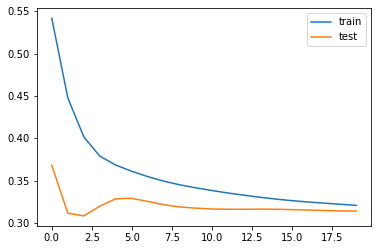

In [211]:
# define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit into model
history = model.fit(train_X, train_y, epochs=20, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history 
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [212]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 50)                13400     
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 13,451
Trainable params: 13,451
Non-trainable params: 0
_________________________________________________________________


In [213]:
#TRAIN RMSE

pred_y_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

# invert scaling for forecast
inv_pred_y_train = concatenate((pred_y_train, train_X[:, 1:]), axis=1) 
inv_pred_y_train = scaler.inverse_transform(inv_pred_y_train)
inv_pred_y_train = inv_pred_y_train[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_train_y = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_train_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,0]

#calculate MAE
mae_train = mae(inv_train_y, inv_pred_y_train)
# calculate RMSE
rmse_train = sqrt(mean_squared_error(inv_train_y, inv_pred_y_train))
print('Train MAE: %.3f' % mae_train, 'Train RMSE: %.3f' % rmse_train)

Train MAE: 1579.395 Train RMSE: 1837.114


In [214]:
date = pd.to_datetime(data_1["Date"])

In [215]:
date[1:491]

1     2019-07-02
2     2019-07-03
3     2019-07-04
4     2019-07-05
5     2019-07-06
         ...    
486   2020-10-29
487   2020-10-30
488   2020-10-31
489   2020-11-01
490   2020-11-02
Name: Date, Length: 490, dtype: datetime64[ns]

In [216]:
type(date)

pandas.core.series.Series

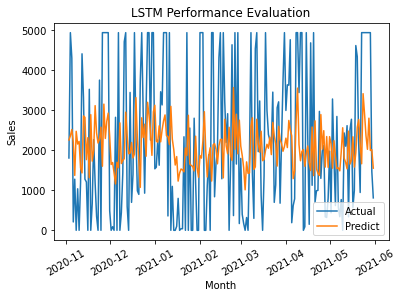

In [217]:
import matplotlib.pyplot as plt
actual = inv_y_test
predict = inv_pred_y_test
dates_model = date[491:]

line_chart1 = plt.plot(dates_model, actual)
line_chart2 = plt.plot(dates_model, predict)
plt.xticks(rotation=30)
plt.title('LSTM Performance Evaluation')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(['Actual', 'Predict'], loc=4)
plt.show()


In [218]:
#TEST RMSE

# make a prediction
pred_y_test = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_pred_y_test = concatenate((pred_y_test, test_X[:, 1:]), axis=1) 
inv_pred_y_test = scaler.inverse_transform(inv_pred_y_test)
inv_pred_y_test = inv_pred_y_test[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y_test = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y_test = scaler.inverse_transform(inv_y_test)
inv_y_test = inv_y_test[:,0]

#calculate MAE
mae_test = mae(inv_y_test, inv_pred_y_test)
# calculate RMSE
rmse_test = sqrt(mean_squared_error(inv_y_test, inv_pred_y_test))
print('Test MAE: %.3f' % mae_test, 'Test RMSE: %.3f' % rmse_test)

Test MAE: 1553.431 Test RMSE: 1828.591


In [219]:
# specify the number of lag hours
n_days = 2
n_features = 16

# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.head())

   var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var6(t-2)  \
2   0.706049        0.0        0.0        0.0        0.0   0.001232   
3   1.000000        0.0        0.0        0.0        0.0   0.000000   
4   1.000000        0.0        0.0        0.0        0.0   0.000000   
5   0.318228        0.0        0.0        0.0        0.0   0.000000   
6   1.000000        0.0        0.0        0.0        0.0   0.000000   

   var7(t-2)  var8(t-2)  var9(t-2)  var10(t-2)  ...  var7(t)  var8(t)  \
2   0.001125        0.0   0.004926         0.0  ...      0.0      0.0   
3   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   
4   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   
5   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   
6   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   

   var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
2      0.0       0.0       0.0       0.0       0.0       0.0

In [220]:
reframed.shape

(699, 48)

In [221]:
# split into train and test sets
values = reframed.values
train = values[:489, :]
test = values[489:, :] 

In [222]:
# split into input and outputs

n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(489, 32) (489,) (210, 32) (210,)


In [223]:
#reshape input to be 3D [samples, timesteps, features]

train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(489, 2, 16) (489,) (210, 2, 16) (210,)


Epoch 1/20
7/7 - 2s - loss: 0.5644 - val_loss: 0.3798 - 2s/epoch - 279ms/step
Epoch 2/20
7/7 - 0s - loss: 0.4220 - val_loss: 0.3346 - 39ms/epoch - 6ms/step
Epoch 3/20
7/7 - 0s - loss: 0.3823 - val_loss: 0.3514 - 41ms/epoch - 6ms/step
Epoch 4/20
7/7 - 0s - loss: 0.3712 - val_loss: 0.3601 - 41ms/epoch - 6ms/step
Epoch 5/20
7/7 - 0s - loss: 0.3611 - val_loss: 0.3520 - 42ms/epoch - 6ms/step
Epoch 6/20
7/7 - 0s - loss: 0.3514 - val_loss: 0.3445 - 42ms/epoch - 6ms/step
Epoch 7/20
7/7 - 0s - loss: 0.3450 - val_loss: 0.3406 - 59ms/epoch - 8ms/step
Epoch 8/20
7/7 - 0s - loss: 0.3405 - val_loss: 0.3389 - 52ms/epoch - 7ms/step
Epoch 9/20
7/7 - 0s - loss: 0.3365 - val_loss: 0.3384 - 45ms/epoch - 6ms/step
Epoch 10/20
7/7 - 0s - loss: 0.3321 - val_loss: 0.3382 - 57ms/epoch - 8ms/step
Epoch 11/20
7/7 - 0s - loss: 0.3273 - val_loss: 0.3378 - 59ms/epoch - 8ms/step
Epoch 12/20
7/7 - 0s - loss: 0.3227 - val_loss: 0.3373 - 37ms/epoch - 5ms/step
Epoch 13/20
7/7 - 0s - loss: 0.3184 - val_loss: 0.3367 - 37ms

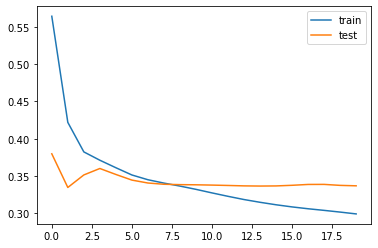

In [224]:
# define network
model = Sequential()
model.add(LSTM(units=50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit model

history = model.fit(train_X, train_y, epochs=20, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [225]:
#TRAIN RMSE

pred_y_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_days*n_features))

# invert scaling for forecast
inv_pred_y_train = concatenate((pred_y_train, train_X[:, -15:]), axis=1) 
inv_pred_y_train = scaler.inverse_transform(inv_pred_y_train)
inv_pred_y_train = inv_pred_y_train[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_train_y = concatenate((train_y, train_X[:, -15:]), axis=1)
inv_train_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,0]

#calculate MAE
mae_train = mae(inv_train_y, inv_pred_y_train)
# calculate RMSE
rmse_train = sqrt(mean_squared_error(inv_train_y, inv_pred_y_train))
print('Train MAE: %.3f' % mae_train, 'Train RMSE: %.3f' % rmse_train)

Train MAE: 1467.129 Train RMSE: 1722.422


In [226]:
#Test RMSE

pred_y = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))

# invert scaling for forecast
inv_pred_y = concatenate((pred_y, test_X[:, -15:]), axis=1)
inv_pred_y = scaler.inverse_transform(inv_pred_y)
inv_pred_y = inv_pred_y[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -15:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#calculate MAE
mae_train = mae(inv_y_test, inv_pred_y_test)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_pred_y))
print('Test MAE: %.3f' % mae_train, 'Test RMSE: %.3f' % rmse_test)

Test MAE: 1553.431 Test RMSE: 1828.591


In [227]:
# specify the number of lag hours
n_days = 3
n_features = 16

# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3   0.706049        0.0        0.0        0.0        0.0   0.001232   
4   1.000000        0.0        0.0        0.0        0.0   0.000000   
5   1.000000        0.0        0.0        0.0        0.0   0.000000   
6   0.318228        0.0        0.0        0.0        0.0   0.000000   
7   1.000000        0.0        0.0        0.0        0.0   0.000000   

   var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  ...  var7(t)  var8(t)  \
3   0.001125        0.0   0.004926         0.0  ...      0.0      0.0   
4   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   
5   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   
6   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   
7   0.000000        0.0   0.000000         0.0  ...      0.0      0.0   

   var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
3      0.0       0.0       0.0       0.0       0.0       0.0

In [228]:
# split into train and test sets

values = reframed.values
train = values[:489, :]
test = values[489:, :]

In [229]:
# split into input and outputs

n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(489, 48) (489,) (209, 48) (209,)


In [230]:
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(489, 3, 16) (489,) (209, 3, 16) (209,)


Epoch 1/20
7/7 - 2s - loss: 0.4713 - val_loss: 0.3228 - 2s/epoch - 323ms/step
Epoch 2/20
7/7 - 0s - loss: 0.3910 - val_loss: 0.3515 - 44ms/epoch - 6ms/step
Epoch 3/20
7/7 - 0s - loss: 0.3710 - val_loss: 0.3633 - 42ms/epoch - 6ms/step
Epoch 4/20
7/7 - 0s - loss: 0.3532 - val_loss: 0.3451 - 39ms/epoch - 6ms/step
Epoch 5/20
7/7 - 0s - loss: 0.3399 - val_loss: 0.3312 - 42ms/epoch - 6ms/step
Epoch 6/20
7/7 - 0s - loss: 0.3325 - val_loss: 0.3281 - 41ms/epoch - 6ms/step
Epoch 7/20
7/7 - 0s - loss: 0.3260 - val_loss: 0.3289 - 40ms/epoch - 6ms/step
Epoch 8/20
7/7 - 0s - loss: 0.3193 - val_loss: 0.3306 - 43ms/epoch - 6ms/step
Epoch 9/20
7/7 - 0s - loss: 0.3127 - val_loss: 0.3320 - 38ms/epoch - 5ms/step
Epoch 10/20
7/7 - 0s - loss: 0.3072 - val_loss: 0.3325 - 44ms/epoch - 6ms/step
Epoch 11/20
7/7 - 0s - loss: 0.3031 - val_loss: 0.3330 - 46ms/epoch - 7ms/step
Epoch 12/20
7/7 - 0s - loss: 0.3001 - val_loss: 0.3336 - 40ms/epoch - 6ms/step
Epoch 13/20
7/7 - 0s - loss: 0.2971 - val_loss: 0.3344 - 38ms

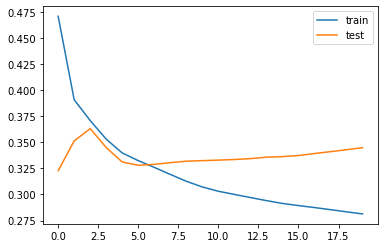

In [231]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [232]:
#TRAIN RMSE

pred_y_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_days*n_features))

# invert scaling for forecast
inv_pred_y_train = concatenate((pred_y_train, train_X[:, -15:]), axis=1) 
inv_pred_y_train = scaler.inverse_transform(inv_pred_y_train)
inv_pred_y_train = inv_pred_y_train[:,0]

# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_train_y = concatenate((train_y, train_X[:, -15:]), axis=1)
inv_train_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,0]

#calculate MAE
mae_train = mae(inv_train_y, inv_pred_y_train)
# calculate RMSE
rmse_train = sqrt(mean_squared_error(inv_train_y, inv_pred_y_train))
print('Train MAE: %.3f' % mae_train, 'Train RMSE: %.3f' % rmse_train)

Train MAE: 1381.011 Train RMSE: 1669.154


In [233]:
#Test RMSE

pred_y = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))

# invert scaling for forecast
inv_pred_y = concatenate((pred_y, test_X[:, -15:]), axis=1)
inv_pred_y = scaler.inverse_transform(inv_pred_y)
inv_pred_y = inv_pred_y[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -15:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#calculate MAE
mae_train = mae(inv_y_test, inv_pred_y_test)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_pred_y))
print('Test MAE: %.3f' % mae_train, 'Test RMSE: %.3f' % rmse_test)

Test MAE: 1553.431 Test RMSE: 1828.591


In [234]:
#creating dataset for modelling 

data_lstm_uni = data_lstm['sales']
data_lstm_uni = data_lstm_uni.to_frame()
data_lstm_uni = data_lstm_uni.values
data_lstm_uni = data_lstm_uni.astype('float32')

In [235]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [236]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_lstm_uni)

In [237]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [238]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch 1/20
7/7 - 2s - loss: 0.5649 - val_loss: 0.4358 - 2s/epoch - 300ms/step
Epoch 2/20
7/7 - 0s - loss: 0.5348 - val_loss: 0.4149 - 39ms/epoch - 6ms/step
Epoch 3/20
7/7 - 0s - loss: 0.5061 - val_loss: 0.3961 - 34ms/epoch - 5ms/step
Epoch 4/20
7/7 - 0s - loss: 0.4788 - val_loss: 0.3800 - 35ms/epoch - 5ms/step
Epoch 5/20
7/7 - 0s - loss: 0.4529 - val_loss: 0.3661 - 39ms/epoch - 6ms/step
Epoch 6/20
7/7 - 0s - loss: 0.4290 - val_loss: 0.3531 - 39ms/epoch - 6ms/step
Epoch 7/20
7/7 - 0s - loss: 0.4072 - val_loss: 0.3424 - 41ms/epoch - 6ms/step
Epoch 8/20
7/7 - 0s - loss: 0.3879 - val_loss: 0.3349 - 43ms/epoch - 6ms/step
Epoch 9/20
7/7 - 0s - loss: 0.3701 - val_loss: 0.3289 - 61ms/epoch - 9ms/step
Epoch 10/20
7/7 - 0s - loss: 0.3551 - val_loss: 0.3240 - 44ms/epoch - 6ms/step
Epoch 11/20
7/7 - 0s - loss: 0.3433 - val_loss: 0.3209 - 37ms/epoch - 5ms/step
Epoch 12/20
7/7 - 0s - loss: 0.3341 - val_loss: 0.3197 - 38ms/epoch - 5ms/step
Epoch 13/20
7/7 - 0s - loss: 0.3271 - val_loss: 0.3190 - 40ms

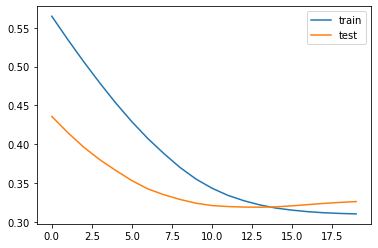

In [239]:
# define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], look_back)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

#fit into model
history = model.fit(trainX, trainY, epochs=20, batch_size=72, validation_data=(testX, testY),
          verbose=2, shuffle = False)

# plot history 
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [240]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainMAE = mae(trainY[0], trainPredict[:,0])
trainRMSE = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train MAE: %.3f' % trainMAE, 'Train RMSE: %.3f' % trainRMSE)
testMAE = mae(testY[0], testPredict[:,0])
testRMSE = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test MAE: %.3f' % testMAE, 'Test RMSE: %.3f' % testRMSE)

Train MAE: 1528.897 Train RMSE: 1747.651
Test MAE: 1611.935 Test RMSE: 1843.381


In [241]:
#creating dataset for modelling - 2time lags

data_lstm_uni = data_lstm['sales']
data_lstm_uni = data_lstm_uni.to_frame()
data_lstm_uni = data_lstm_uni.values
data_lstm_uni = data_lstm_uni.astype('float32')

In [243]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [244]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_lstm_uni)

In [245]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [246]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch 1/20
7/7 - 3s - loss: 0.6011 - val_loss: 0.4562 - 3s/epoch - 433ms/step
Epoch 2/20
7/7 - 0s - loss: 0.5578 - val_loss: 0.4263 - 32ms/epoch - 5ms/step
Epoch 3/20
7/7 - 0s - loss: 0.5188 - val_loss: 0.4009 - 34ms/epoch - 5ms/step
Epoch 4/20
7/7 - 0s - loss: 0.4824 - val_loss: 0.3796 - 34ms/epoch - 5ms/step
Epoch 5/20
7/7 - 0s - loss: 0.4486 - val_loss: 0.3624 - 32ms/epoch - 5ms/step
Epoch 6/20
7/7 - 0s - loss: 0.4184 - val_loss: 0.3477 - 31ms/epoch - 4ms/step
Epoch 7/20
7/7 - 0s - loss: 0.3911 - val_loss: 0.3372 - 32ms/epoch - 5ms/step
Epoch 8/20
7/7 - 0s - loss: 0.3673 - val_loss: 0.3299 - 35ms/epoch - 5ms/step
Epoch 9/20
7/7 - 0s - loss: 0.3471 - val_loss: 0.3260 - 32ms/epoch - 5ms/step
Epoch 10/20
7/7 - 0s - loss: 0.3311 - val_loss: 0.3240 - 33ms/epoch - 5ms/step
Epoch 11/20
7/7 - 0s - loss: 0.3205 - val_loss: 0.3235 - 35ms/epoch - 5ms/step
Epoch 12/20
7/7 - 0s - loss: 0.3138 - val_loss: 0.3239 - 33ms/epoch - 5ms/step
Epoch 13/20
7/7 - 0s - loss: 0.3097 - val_loss: 0.3254 - 33ms

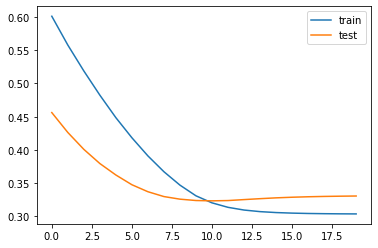

In [247]:
# define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], look_back)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

#fit into model
history = model.fit(trainX, trainY, epochs=20, batch_size=72, validation_data=(testX, testY),
          verbose=2, shuffle = False)

# plot history 
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [248]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainMAE = mae(trainY[0], trainPredict[:,0])
trainRMSE = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train MAE: %.3f' % trainMAE, 'Train RMSE: %.3f' % trainRMSE)
testMAE = mae(testY[0], testPredict[:,0])
testRMSE = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test MAE: %.3f' % testMAE, 'Test RMSE: %.3f' % testRMSE)

Train MAE: 1500.124 Train RMSE: 1711.765
Test MAE: 1634.974 Test RMSE: 1861.240
